In [7]:
import numpy as np
import matplotlib.pyplot as plt


path_tot = "/home/emanuele/data/emanuele/loki-das/Data/e0043.189.06array_3d_tot.npy"
path_sta = "/home/emanuele/data/emanuele/loki-das/Data/e0043.189.06array_3d_sta.npy"
path_ch = "/home/emanuele/data/emanuele/loki-das/Data/e0043.189.06array_3d_fiber.npy"

#path_tot = "/home/emanuele/data/emanuele/loki-das/Data/e0269.169.07array_3d_tot.npy"
#path_sta = "/home/emanuele/data/emanuele/loki-das/Data/e0269.169.07array_3d_sta.npy"
#path_ch = "/home/emanuele/data/emanuele/loki-das/Data/e0269.169.07array_3d_fiber.npy"

#path_tot = "/home/emanuele/LOKI-DAS/tests/array_3d_tot.npy"
#path_sta = "/home/emanuele/LOKI-DAS/tests/array_3d_sta.npy"
#path_ch = "/home/emanuele/LOKI-DAS/tests/array_3d_fiber.npy"

In [8]:
corrmatrix_tot = np.load(path_tot)
corrmatrix_sta = np.load(path_sta)
corrmatrix_ch = np.load(path_ch)

In [9]:
print(corrmatrix_sta.shape)

corrmatrix_sta = np.reshape(corrmatrix_sta,(101,101,101))

(1030301,)


import matplotlib.pyplot as plt
import numpy as np

# Define spacing
spacing = 0.38 / np.sqrt(2)  # Grid spacing in physical units
grid_points = np.arange(21) * spacing  # Adjusted axis values

# Extract slices
slice_xy = corrmatrix_sta[:, :, 0].T  # Ensure [ny, nx] structure
slice_xz = corrmatrix_sta[:, 0, :].T  # Ensure [nz, nx] structure
slice_yz = corrmatrix_sta[0, :, :].T  # Ensure [nz, ny] structure

#slice_xy = corrmatrix_sta[:, :, 0]  # Ensure [ny, nx] structure
#slice_xz = corrmatrix_sta[:, 0, :]  # Ensure [nz, nx] structure
#slice_yz = corrmatrix_sta[0, :, :]  # Ensure [nz, ny] structure

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# XY Plane (Z=0)
c1 = axes[0].contourf(grid_points, grid_points, slice_xy, cmap="viridis")
axes[0].set_title("XY Plane (Z=0)")
axes[0].set_xlabel("X (km)")
axes[0].set_ylabel("Y (km)")
fig.colorbar(c1, ax=axes[0])

# XZ Plane (Y=0) - Invert Z-axis so Z=0 is at the top
c2 = axes[1].contourf(grid_points, grid_points, slice_xz, cmap="viridis")
axes[1].set_title("XZ Plane (Y=0)")
axes[1].set_xlabel("X (km)")
axes[1].set_ylabel("Z (km)")
axes[1].invert_yaxis()  # Invert Z-axis
fig.colorbar(c2, ax=axes[1])

# YZ Plane (X=0) - Invert Z-axis so Z=0 is at the top
c3 = axes[2].contourf(grid_points, grid_points, slice_yz, cmap="viridis")
axes[2].set_title("YZ Plane (X=0)")
axes[2].set_xlabel("Y (km)")
axes[2].set_ylabel("Z (km)")
axes[2].invert_yaxis()  # Invert Z-axis
fig.colorbar(c3, ax=axes[2])

plt.tight_layout()
plt.show()


In [10]:
import numpy as num
import matplotlib.pyplot as plt
import utm

def convert_to_utm(lat, lon, ref_lat=51.64, ref_lon=7.72):
    ref_east, ref_north, _, _ = utm.from_latlon(ref_lat, ref_lon)
    east, north, _, _ = utm.from_latlon(lat, lon)
    return (east - ref_east) / 1000, (north - ref_north) / 1000

# Station coordinates (lat, lon)
stations = {
    "HM01": (51.67223, 7.73717), "HM02": (51.65656, 7.74178), "HM03": (51.66499, 7.74745),
    "HM04": (51.66097, 7.73808), "HM05": (51.65890, 7.74283), "HM06": (51.65965, 7.75079),
    "HM07": (51.65704, 7.74071), "HM08": (51.65624, 7.74555), "HM09": (51.65616, 7.75536),
    "HM10": (51.65312, 7.73344), "HM11": (51.65334, 7.74765), "HM12": (51.64850, 7.75228),
    "HM13": (51.64538, 7.73056), "HM14": (51.64781, 7.74162), "HM20": (51.65312, 7.73344)
}

# Convert to UTM relative to reference station
station_coords = {key: convert_to_utm(lat, lon) for key, (lat, lon) in stations.items()}

print(station_coords)

def coherence_plot(corrmatrix, xax, yax, zax, itrial, normalization=False):
    nx, ny, nz = num.shape(corrmatrix)
    CXY = num.zeros([ny, nx])
    for i in range(ny):
        for j in range(nx):
            CXY[i, j] = num.max(corrmatrix[j, i, :])

    CXZ = num.zeros([nz, nx])
    for i in range(nz):
        for j in range(nx):
            CXZ[i, j] = num.max(corrmatrix[j, :, i])

    CYZ = num.zeros([nz, ny])
    for i in range(nz):
        for j in range(ny):
            CYZ[i, j] = num.max(corrmatrix[:, j, i])

    if normalization:
        nrm = plt.Normalize(vmin=0., vmax=1.)
    else:
        nrm = None

    xticks=num.min(xax)+num.arange(6)*(num.max(xax)-num.min(xax))/5
    yticks=num.min(yax)+num.arange(6)*(num.max(yax)-num.min(yax))/5
    zticks=num.min(zax)+num.arange(6)*(num.max(zax)-num.min(zax))/5

    fig, axs = plt.subplots(1, 3, figsize=(15, 7.5), dpi = 400)
    fig.suptitle('Coherence matrices LION lookup 101*101 (dx=dz=0.07)' , fontsize=20, fontweight='bold')
    cmap = plt.cm.get_cmap('viridis', 100)

    ax1 = axs[0]
    cs1 = ax1.contourf(xax, yax, CXY, 20, cmap=cmap, norm=nrm)
    ax1.set_xticks(xticks)
    ax1.set_yticks(yticks)
    ax1.set_xlim(0, 7.1)
    ax1.set_ylim(0, 7.1)
    ax1.set_xlabel('X (km)')
    ax1.set_ylabel('Y (km)')
    ax1.set_aspect('auto')

    ax2 = axs[1]
    cs2 = ax2.contourf(yax, zax, CYZ, 20, cmap=cmap, norm=nrm)
    ax2.set_xticks(yticks)
    ax2.set_yticks(zticks)
    ax2.set_xlim(0, 7.1)
    ax2.set_ylim(0, 7.1)
    ax2.set_xlabel('Y (km)')
    ax2.set_ylabel('Z (km)')
    ax2.set_aspect('auto')
    ax2.invert_yaxis()

    ax3 = axs[2]
    cs3 = ax3.contourf(xax, zax, CXZ, 20, cmap=cmap, norm=nrm)
    ax3.set_xticks(xticks)
    ax3.set_yticks(zticks)
    ax3.set_xlim(0, 7.1)
    ax3.set_ylim(0, 7.1)
    ax3.set_xlabel('X (km)')
    ax3.set_ylabel('Z (km)')
    ax3.set_aspect('auto')
    ax3.invert_yaxis()

    # Plot station locations as red triangles on all three subplots
    #for key, (east_km, north_km) in station_coords.items():
    #    ax1.scatter(east_km, north_km, marker='^', color='orange', label=key if key == 'HM01' else "")
    #    ax1.text(east_km, north_km, key, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
    #    ax2.scatter(north_km, 0, marker='^', color='orange', label=key if key == 'HM01' else "")
    #    ax2.text(north_km, 0, key, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
    #    ax3.scatter(east_km, 0, marker='^', color='orange', label=key if key == 'HM01' else "")
    #    ax3.text(east_km, 0, key, fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    cbar = plt.colorbar(cs1, ax=axs, orientation='horizontal', shrink=0.6)
    cbar.set_label('Coherence')
    plt.show()





{'HM01': (1.2500645127492607, 3.5636254817638546), 'HM02': (1.5388091728080762, 1.815457603899762), 'HM03': (1.9470856107043801, 2.746219516511075), 'HM04': (1.2913506316963468, 2.3103096589408816), 'HM05': (1.6159176821075962, 2.074438851358369), 'HM06': (2.167915899508458, 2.1483999371603133), 'HM07': (1.4657167269933853, 1.8701139807030558), 'HM08': (1.798972037946107, 1.7753849252564833), 'HM09': (2.4773915414433576, 1.7548795661367476), 'HM10': (0.9552910495871328, 1.4428655109833926), 'HM11': (1.9387023049762355, 1.4503827052116394), 'HM12': (2.24979215421807, 0.90664438940119), 'HM13': (0.7411056839544327, 0.5855591761637479), 'HM14': (1.5109781022052047, 0.8425600505275652), 'HM20': (0.9552910495871328, 1.4428655109833926)}


In [11]:
num.shape(corrmatrix_sta)

(101, 101, 101)

101 101 101


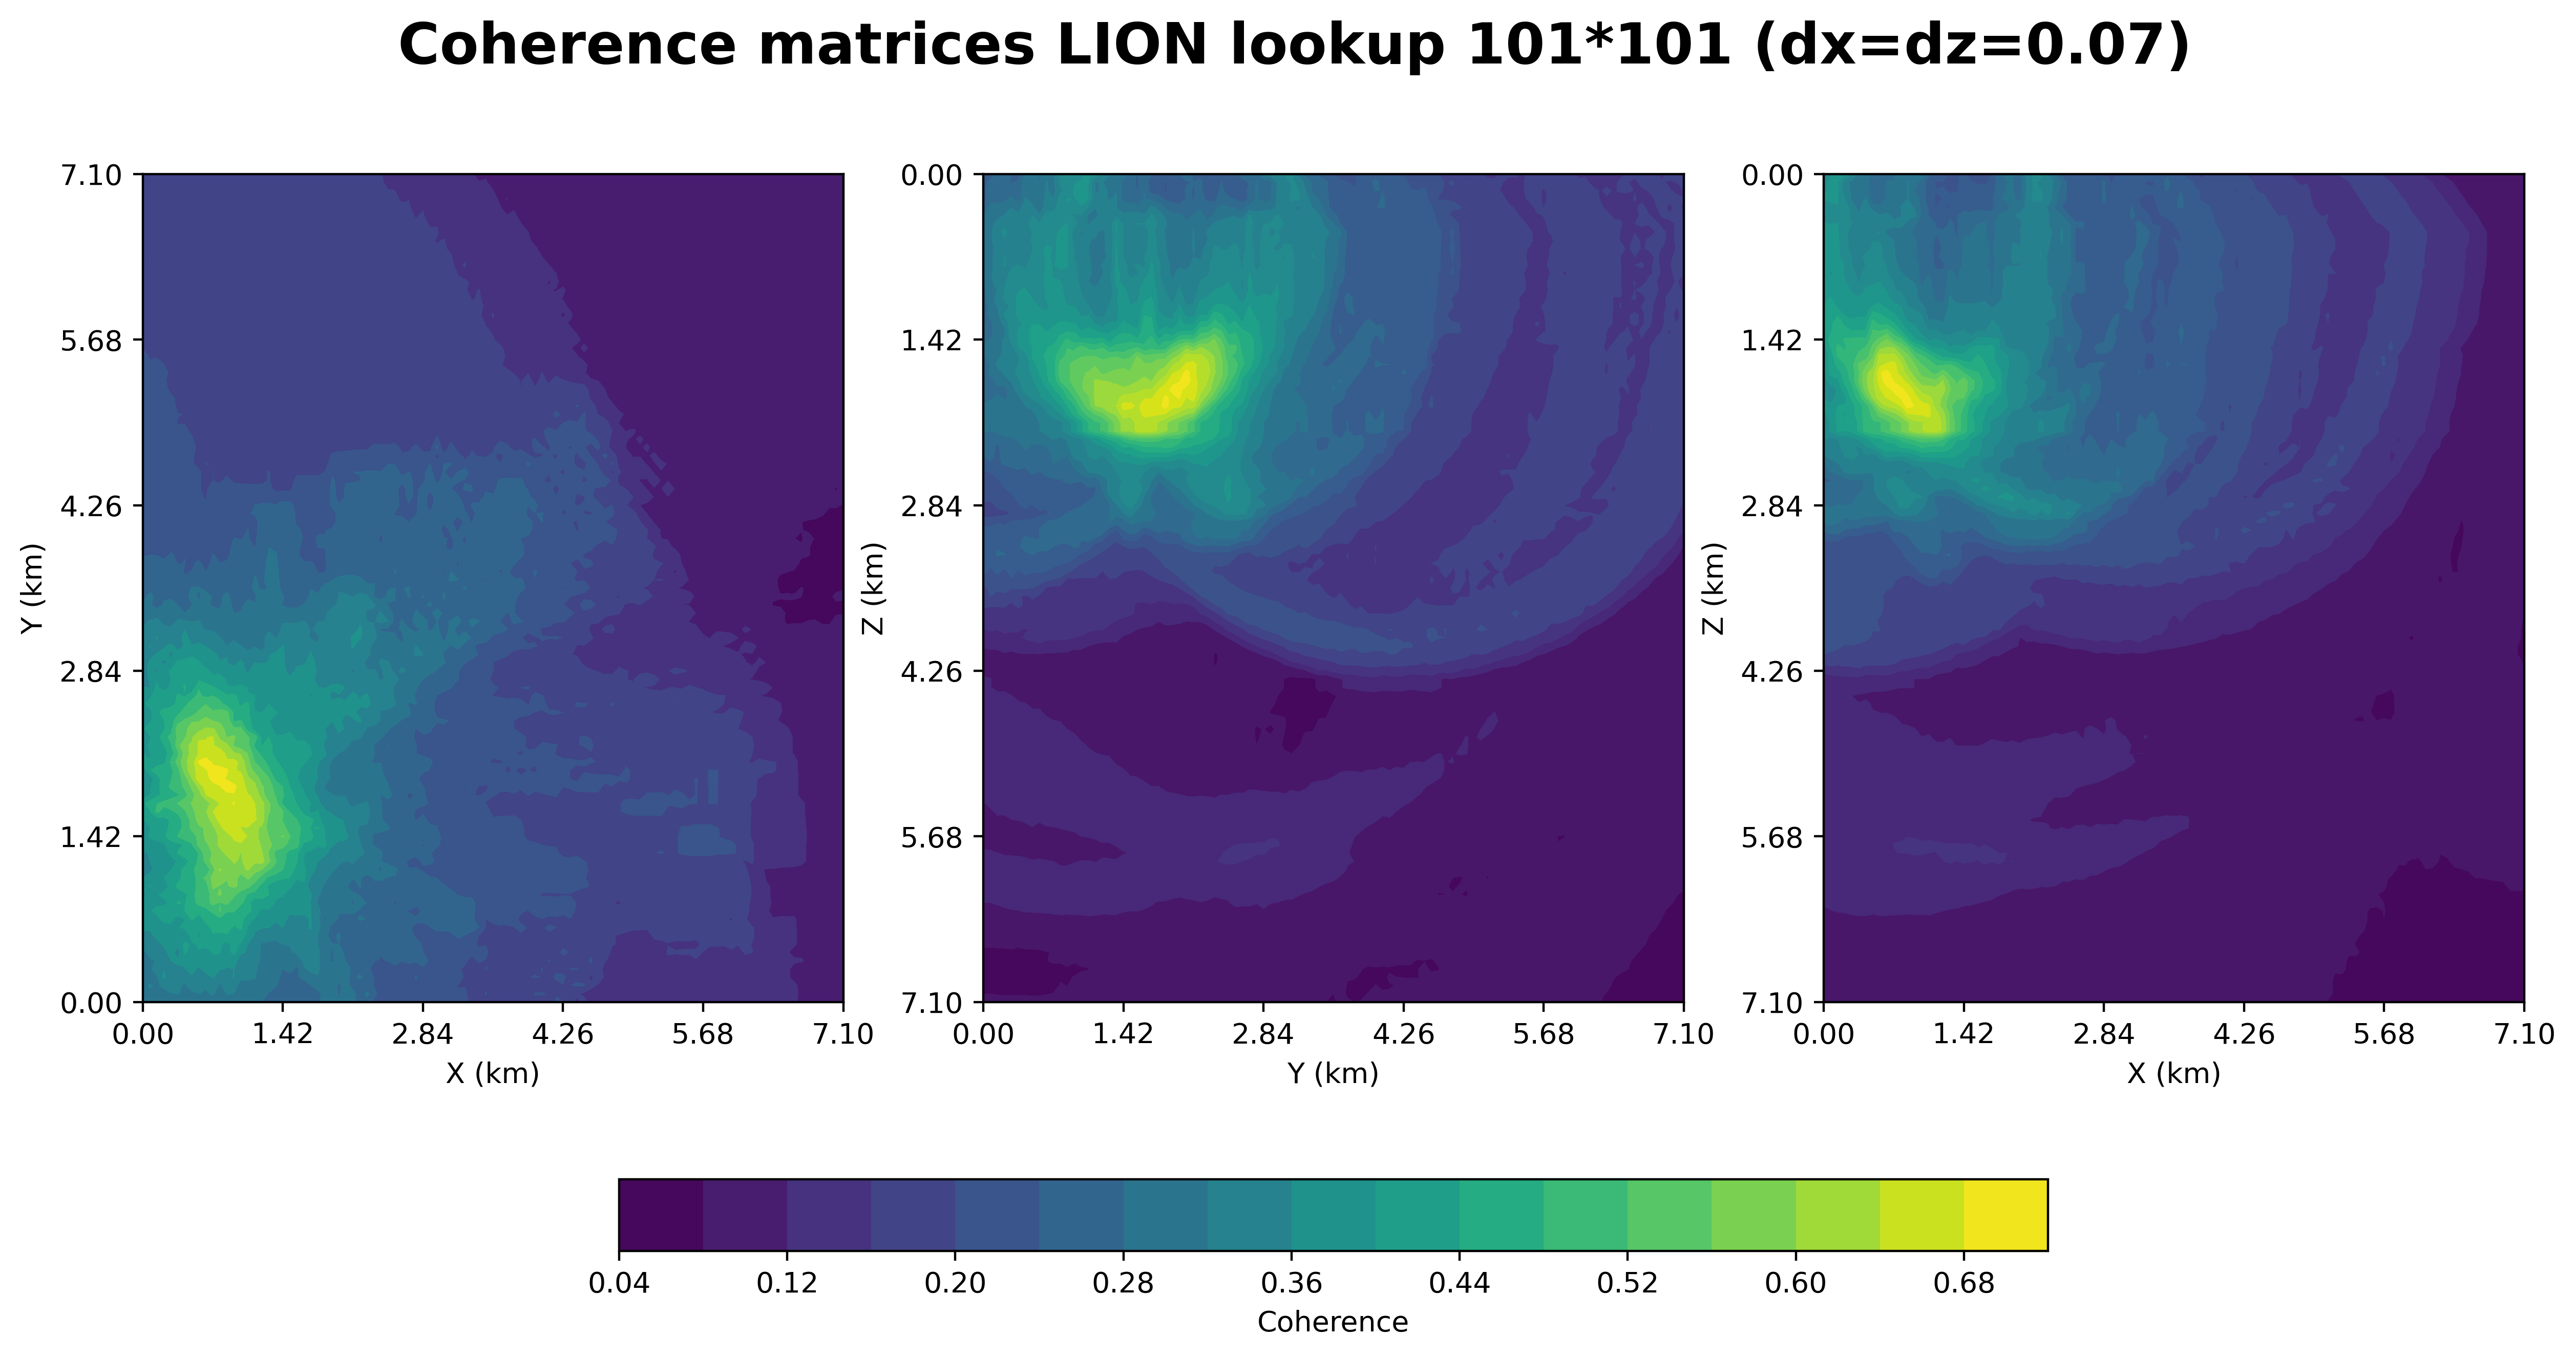

In [13]:
dx = 0.071
nx = 101
nz = 101
dz = 0.071

#nx, dx, nz, dz are referred to the diagonal of the domain 

x =  num.arange(0, (nx  * dx), dx)  #define the grid search based on the 2D traveltime grid
y =  num.arange(0, (nx  * dx), dx)  #define the grid search based on the 2D traveltime grid
z =  num.arange(0, (nz * dz) , dz) #define the grid search based on the 2D traveltime grid

#x =  num.arange(0, 7.15, 0.71)  #define the grid search based on the 2D traveltime grid
#y =  num.arange(0, 7.15, 0.71)  #define the grid search based on the 2D traveltime grid
#z =  num.arange(0, (nz * dz) , dz) #define the grid search based on the 2D traveltime grid


#z = z[0:101]
#x = (num.arange(0,nx)*dx)  #define the grid search based on the 2D traveltime grid
#y = (num.arange(0,nx)*dx)  #define the grid search based on the 2D traveltime grid (cateto della diagonale)
#z = (num.arange(0,nz)*dz)  

print(len(x),len(y),len(z))
coherence_plot(corrmatrix_sta, x, y, z, itrial=1)


[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.28284271 0.28284271 0.28284271 ... 0.28284271 0.28284271 0.28284271]
  [0.28284271 0.28284271 0.28284271 ... 0.28284271 0.28284271 0.28284271]
  [0.28284271 0.28284271 0.28284271 ... 0.28284271 0.28284271 0.28284271]
  ...
  [0.28284271 0.28284271 0.28284271 ... 0.28284271 0.28284271 0.28284271]
  [0.28284271 0.28284271 0.28284271 ... 0.28284271 0.28284271 0.28284271]
  [0.28284271 0.28284271 0.28284271 ... 0.28284271 0.28284271 0.28284271]]

 [[0.56568542 0.56568542 0.56568542 ... 0.56568542 0.56568542 0.56568542]
  [0.56568542 0.565685

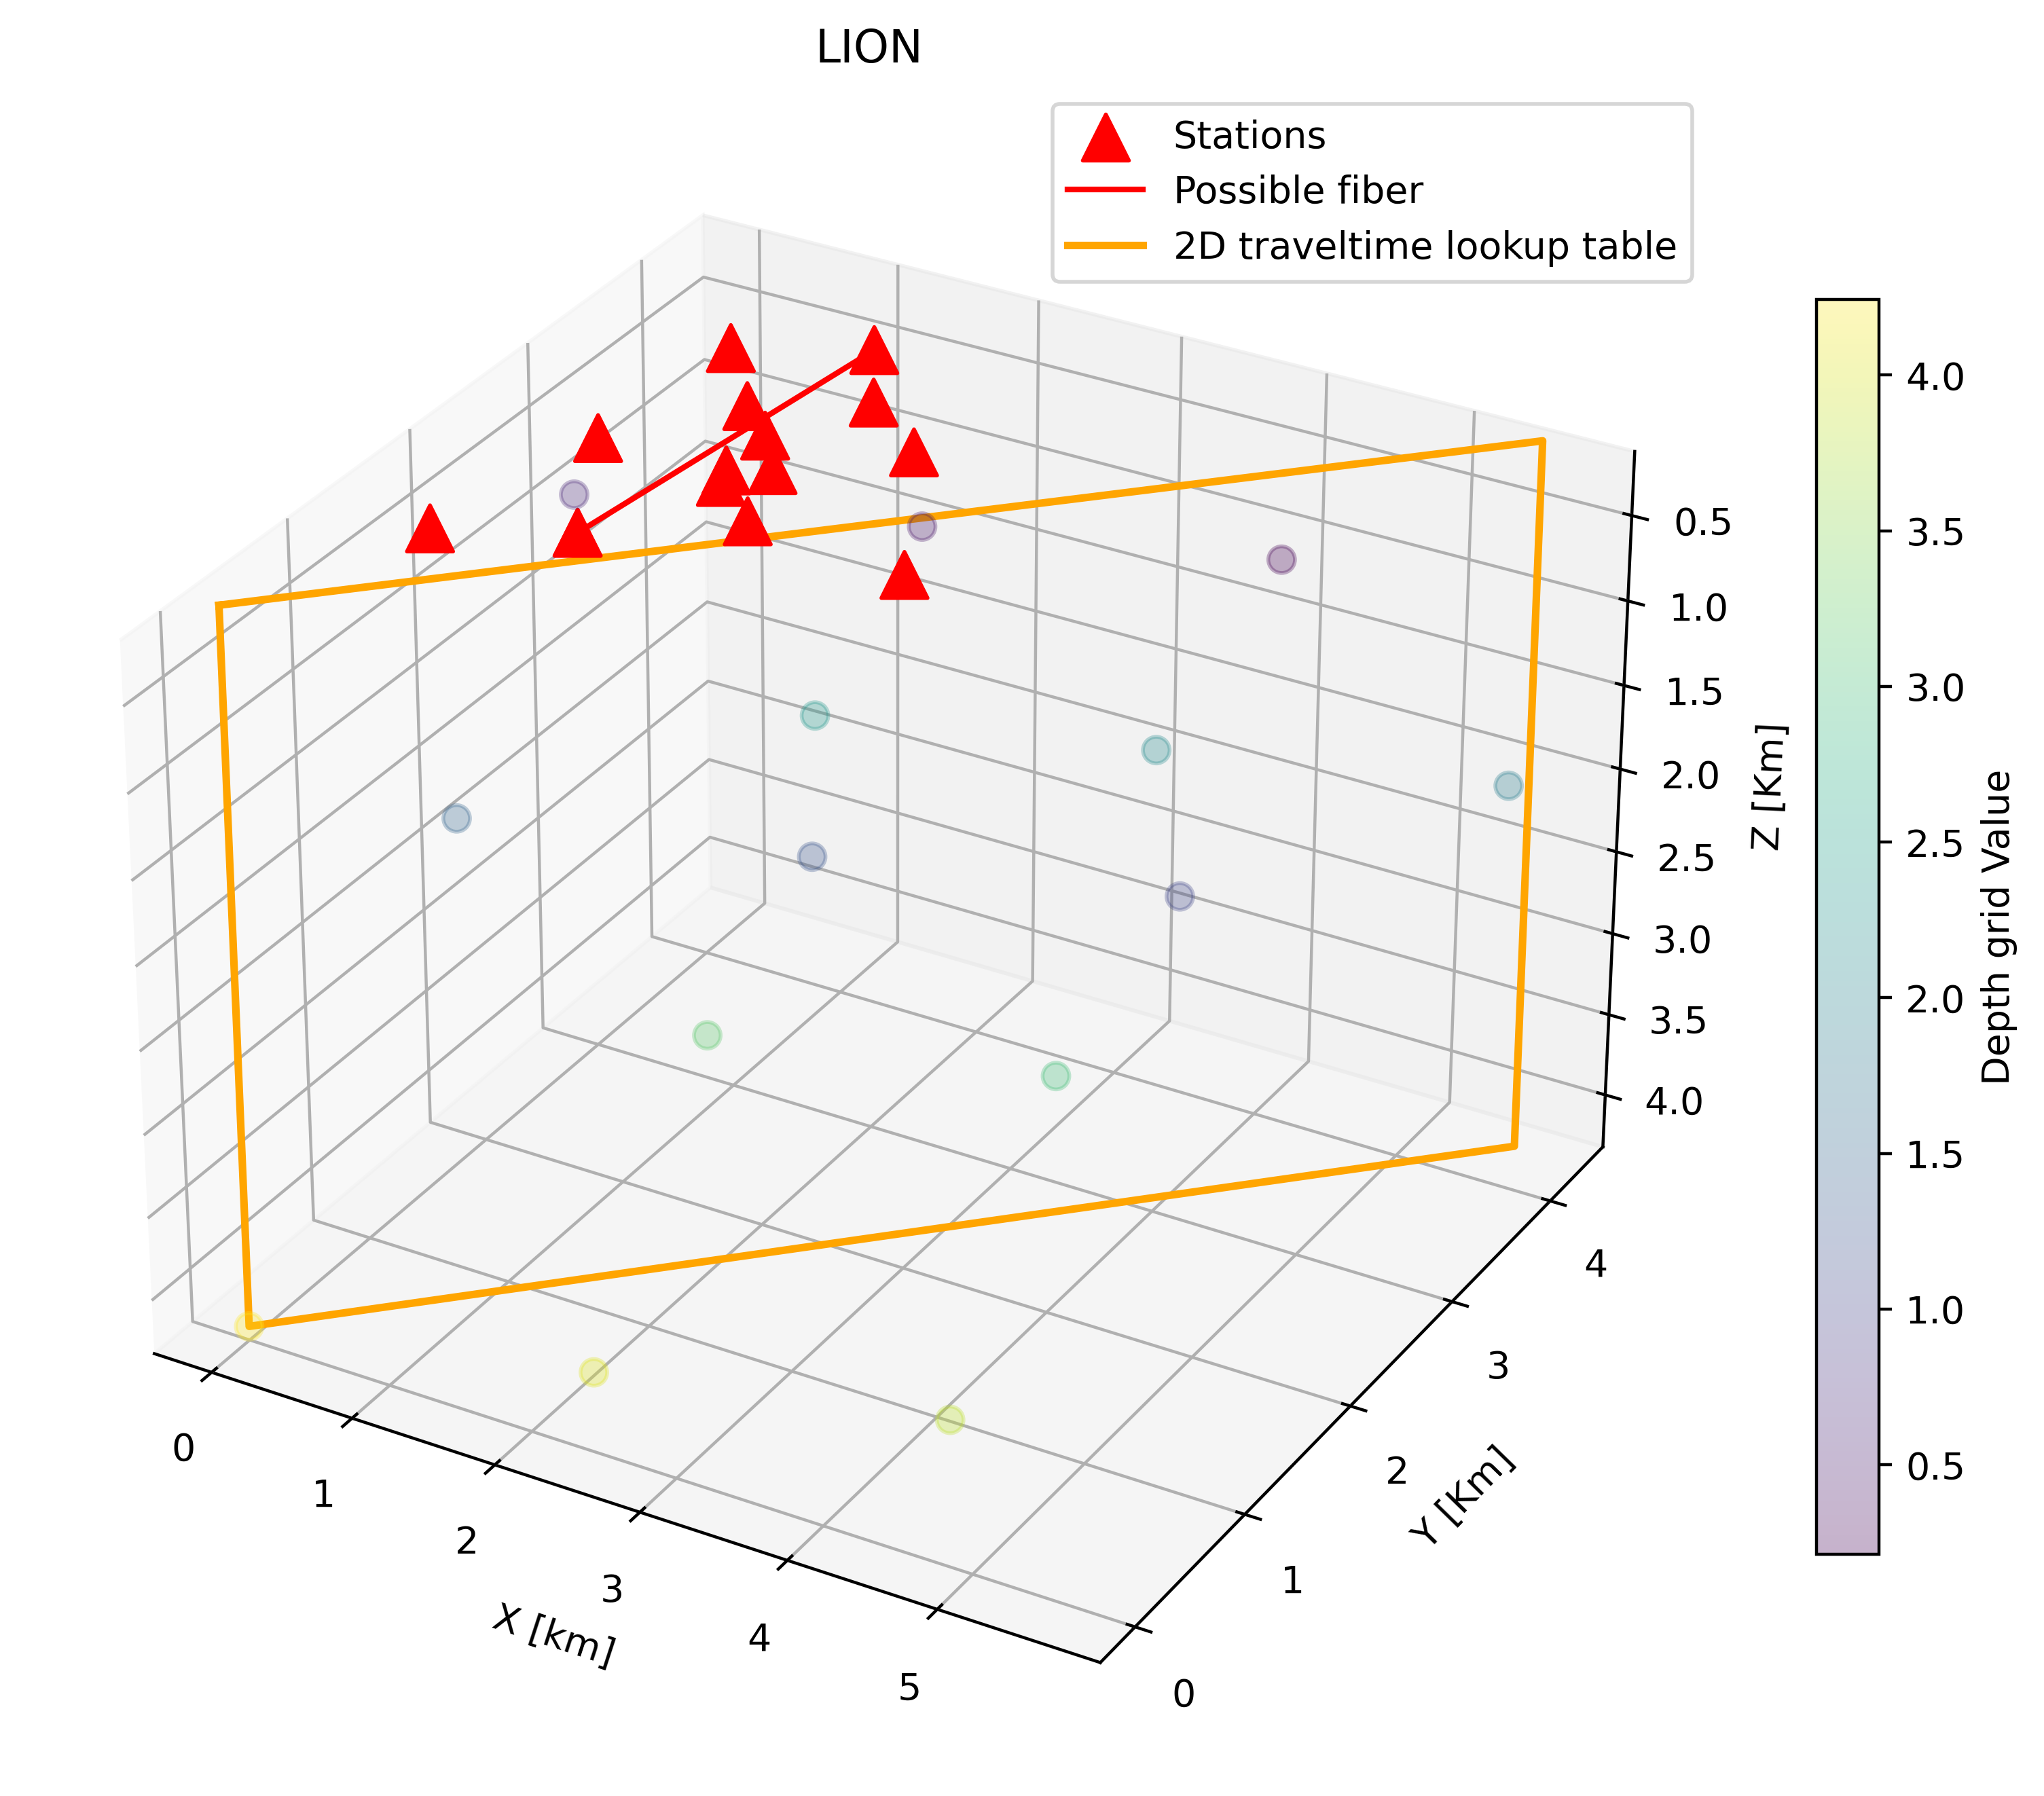

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny, nz = 21, 21, 21  # Number of points in each direction (X, Y, Z)
dx, dy, dz = 0.4/np.sqrt(2), 0.3/np.sqrt(2), 0.3/np.sqrt(2)  # Grid spacing (X, Y, Z)

# Define X, Y, Z ranges starting from (0, 0) at the corner
x = np.linspace(0, (dx * (nx - 1)), nx)  # X values (longitude), starting from 0
y = np.linspace(0, (dy * (ny - 1)), ny)  # Y values (latitude), starting from 0
z = np.linspace(0, ((nz - 1) * dz), nz)  # Z values (depth)

# Reverse the Z values to ensure depth=0 is at the top and increasing depth goes downward
z = z[::-1]

# Create the meshgrid (X, Y, Z)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

print(X)

# Flatten the meshgrid to 1D arrays
lon_source = X.ravel()  # Flatten X values (longitude)
lat_source = Y.ravel()  # Flatten Y values (latitude)
depth_source = Z.ravel()  # Flatten Z values (depth)

# Reduce the number of grid points (downsample by selecting every nth point)
n = 710  # Factor by which to downsample (adjust as needed)
lon_source = lon_source[::n]
lat_source = lat_source[::n]
depth_source = depth_source[::n]

# Station coordinates (replace with your actual station data)
stations = [
    ("HM01", 3.223, 1.717, 0.0),
    ("HM02", 1.656, 2.178, 0.0),
    ("HM03", 2.499, 2.745, 0.0),
    ("HM04", 2.097, 1.808, 0.0),
    ("HM05", 1.890, 2.283, 0.0),
    ("HM06", 1.965, 3.079, 0.0),
    ("HM07", 1.704, 2.071, 0.0),
    ("HM08", 1.624, 2.555, 0.0),
    ("HM09", 1.616, 3.536, 0.0),
    ("HM10", 1.312, 1.344, 0.0),
    ("HM11", 1.334, 2.765, 0.0),
    ("HM12", 0.850, 3.228, 0.0),
    ("HM13", 0.538, 1.056, 0.0),
    ("HM14", 0.781, 2.162, 0.0),
    ("HM20", 1.312, 1.344, 0.0),
]

# Extract the station coordinates
station_lons = [s[1] for s in stations]
station_lats = [s[2] for s in stations]
station_depths = [s[3] for s in stations]

# Plot the grid points in 3D
fig = plt.figure(figsize=(10, 10), dpi = 400)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the reduced grid points with transparency
sc = ax.scatter(lon_source, lat_source, depth_source, c=depth_source, cmap='viridis', s=50, alpha=0.3)

# Scatter plot for the stations as red triangles (plot after the grid points to ensure they are on top)
ax.scatter(station_lons, station_lats, station_depths, color='red', marker='^', s=150, label="Stations", alpha=1)
ax.plot(station_lons[8:10], station_lats[8:10], station_depths[8:10], color = 'red',label = 'Possible fiber')

# Diagonal rectangle extending vertically from (0, 0, 0) to the opposite corner of the cube
# We will define a diagonal along the Z axis, and extend it along the plane diagonal.
max_x = dx * (nx - 1)
max_y = dy * (ny - 1)
max_z = dz * (nz - 1)

# Define the four corners of the rectangle
x_rect = [0, max_x]
y_rect = [0, max_y]
z_rect = [0, max_z]

# Generate points for the vertical rectangle that extends along the diagonal of the cube
rect_x = np.array([0, 0, max_x, max_x, 0])
rect_y = np.array([0, 0, max_y, max_y, 0])
rect_z = np.array([0, max_z, max_z, 0, 0])

# Plot the rectangle in 3D space along the diagonal
ax.plot(rect_x, rect_y, rect_z, color='orange', linewidth=2, label="2D traveltime lookup table")

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("Depth grid Value")

# Set Z-axis limits manually to ensure 0 is at the top (invert the Z-axis)
ax.set_zlim([np.max(depth_source), np.min(depth_source)])

# Labels
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [Km]')
ax.set_zlabel('Z [Km]')
ax.set_title('LION')

# Show legend for stations
ax.legend()

# Show the plot
plt.show()


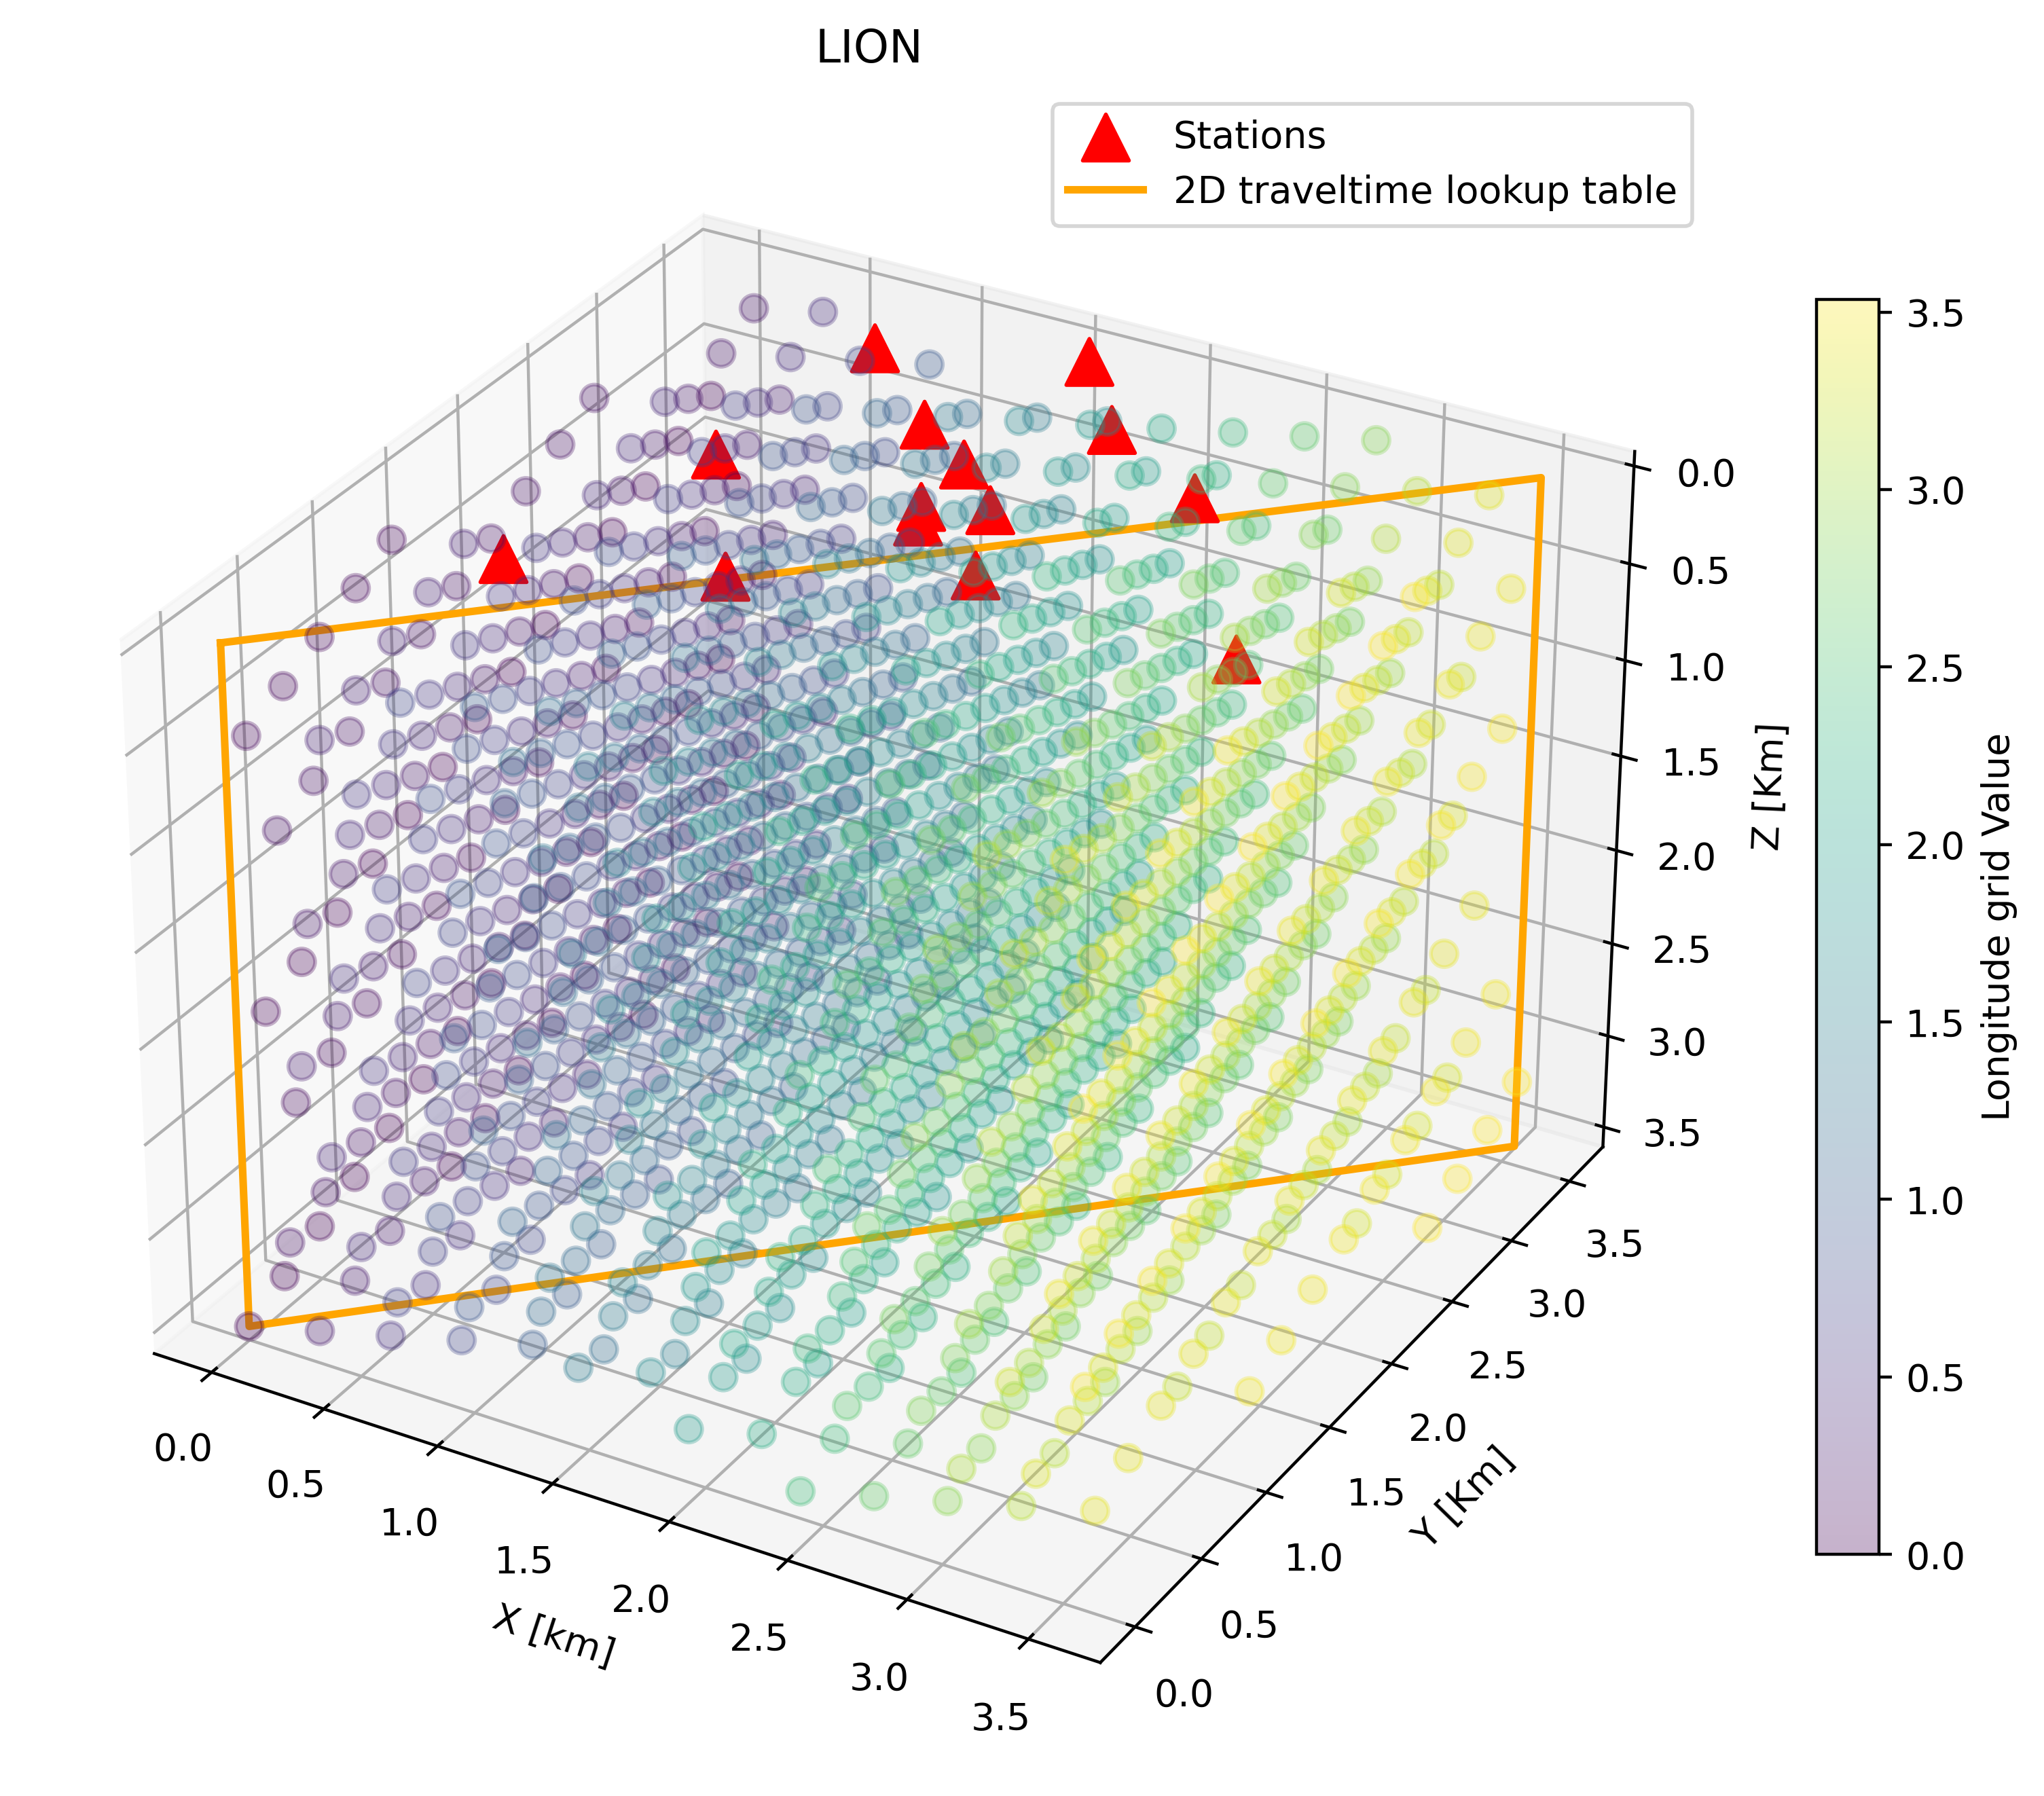

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny, nz = 101, 101, 101  # Number of points in each direction (X, Y, Z)
dx, dy, dz = 0.05/np.sqrt(2), 0.05/np.sqrt(2), 0.05/np.sqrt(2)  # Grid spacing (X, Y, Z)

# Define X, Y, Z ranges starting from (0, 0) at the corner
x = np.linspace(0, (dx * (nx - 1)), nx)  # X values (longitude), starting from 0
y = np.linspace(0, (dy * (ny - 1)), ny)  # Y values (latitude), starting from 0
z = np.linspace(0, ((nz - 1) * dz), nz)  # Z values (depth)

# Reverse the Z values to ensure depth=0 is at the top and increasing depth goes downward
z = z[::-1]

# Create the meshgrid (X, Y, Z)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Flatten the meshgrid to 1D arrays
lon_source = X.ravel()  # Flatten X values (longitude)
lat_source = Y.ravel()  # Flatten Y values (latitude)
depth_source = Z.ravel()  # Flatten Z values (depth)

# Reduce the number of grid points (downsample by selecting every nth point)
n = 710  # Factor by which to downsample (adjust as needed)
lon_source = lon_source[::n]
lat_source = lat_source[::n]
depth_source = depth_source[::n]

# Station coordinates (replace with your actual station data)
stations = [
    ("HM01", 3.223, 1.717, 0.0),
    ("HM02", 1.656, 2.178, 0.0),
    ("HM03", 2.499, 2.745, 0.0),
    ("HM04", 2.097, 1.808, 0.0),
    ("HM05", 1.890, 2.283, 0.0),
    ("HM06", 1.965, 3.079, 0.0),
    ("HM07", 1.704, 2.071, 0.0),
    ("HM08", 1.624, 2.555, 0.0),
    ("HM09", 1.616, 3.536, 0.0),
    ("HM10", 1.312, 1.344, 0.0),
    ("HM11", 1.334, 2.765, 0.0),
    ("HM12", 0.850, 3.228, 0.0),
    ("HM13", 0.538, 1.056, 0.0),
    ("HM14", 0.781, 2.162, 0.0),
    ("HM20", 1.312, 1.344, 0.0),
]

# Extract the station coordinates
station_lons = [s[1] for s in stations]
station_lats = [s[2] for s in stations]
station_depths = [s[3] for s in stations]

# Plot the grid points in 3D
fig = plt.figure(figsize=(10, 10), dpi = 400)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the reduced grid points with transparency
sc = ax.scatter(lon_source, lat_source, depth_source, c=lon_source, cmap='viridis', s=50, alpha=0.3)

# Scatter plot for the stations as red triangles (plot after the grid points to ensure they are on top)
ax.scatter(station_lons, station_lats, station_depths, color='red', marker='^', s=150, label="Stations", alpha=1)

# Diagonal rectangle extending vertically from (0, 0, 0) to the opposite corner of the cube
# We will define a diagonal along the Z axis, and extend it along the plane diagonal.
max_x = dx * (nx - 1)
max_y = dy * (ny - 1)
max_z = dz * (nz - 1)

# Define the four corners of the rectangle
x_rect = [0, max_x]
y_rect = [0, max_y]
z_rect = [0, max_z]

# Generate points for the vertical rectangle that extends along the diagonal of the cube
rect_x = np.array([0, 0, max_x, max_x, 0])
rect_y = np.array([0, 0, max_y, max_y, 0])
rect_z = np.array([0, max_z, max_z, 0, 0])

# Plot the rectangle in 3D space along the diagonal
ax.plot(rect_x, rect_y, rect_z, color='orange', linewidth=2, label="2D traveltime lookup table")

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("Longitude grid Value")

# Set Z-axis limits manually to ensure 0 is at the top (invert the Z-axis)
ax.set_zlim([np.max(depth_source), np.min(depth_source)])

# Labels
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [Km]')
ax.set_zlabel('Z [Km]')
ax.set_title('LION')

# Show legend for stations
ax.legend()

# Show the plot
plt.show()


(101, 101, 101) (1030301,)


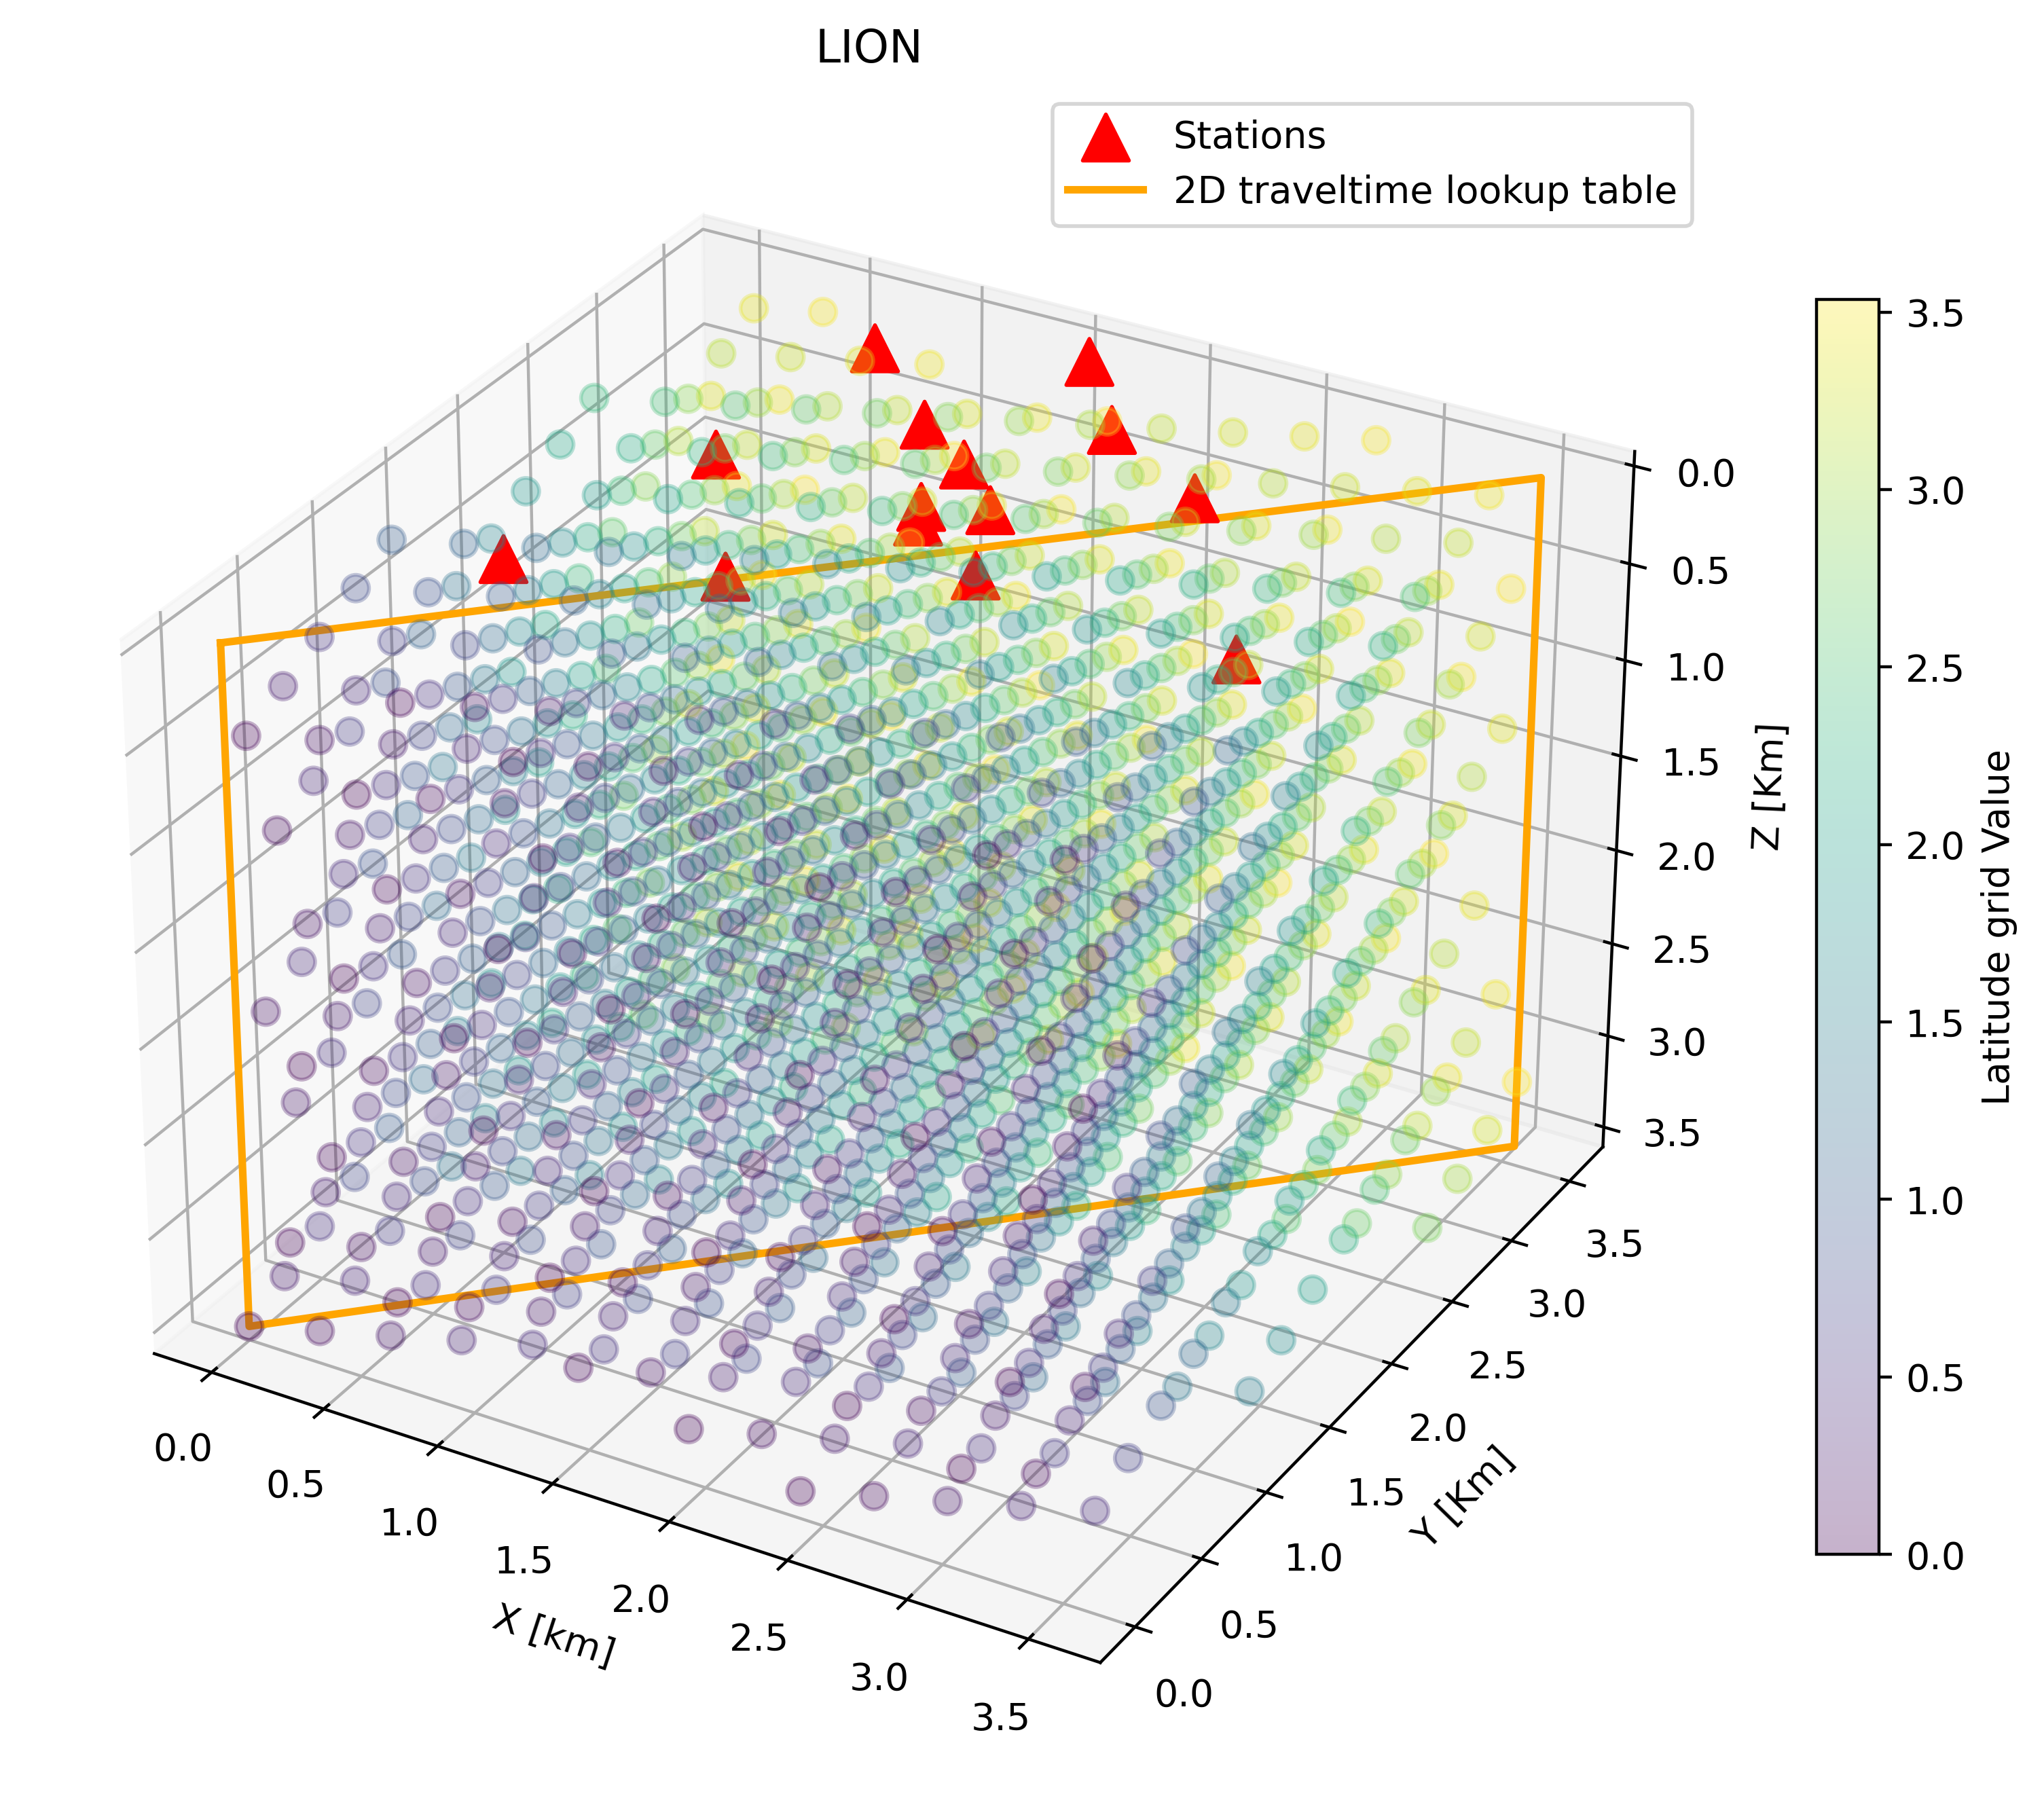

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny, nz = 101, 101, 101  # Number of points in each direction (X, Y, Z)
dx, dy, dz = 0.05/np.sqrt(2), 0.05/np.sqrt(2), 0.05/np.sqrt(2)  # Grid spacing (X, Y, Z)

# Define X, Y, Z ranges starting from (0, 0) at the corner
x = np.linspace(0, (dx * (nx - 1)), nx)  # X values (longitude), starting from 0
y = np.linspace(0, (dy * (ny - 1)), ny)  # Y values (latitude), starting from 0
z = np.linspace(0, ((nz - 1) * dz), nz)  # Z values (depth)

# Reverse the Z values to ensure depth=0 is at the top and increasing depth goes downward
z = z[::-1]

# Create the meshgrid (X, Y, Z)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

print(X.shape, X.ravel().shape)

# Flatten the meshgrid to 1D arrays
lon_source = X.ravel()  # Flatten X values (longitude)
lat_source = Y.ravel()  # Flatten Y values (latitude)
depth_source = Z.ravel()  # Flatten Z values (depth)

# Reduce the number of grid points (downsample by selecting every nth point)
n = 710  # Factor by which to downsample (adjust as needed)
lon_source = lon_source[::n]
lat_source = lat_source[::n]
depth_source = depth_source[::n]

# Station coordinates (replace with your actual station data)
stations = [
    ("HM01", 3.223, 1.717, 0.0),
    ("HM02", 1.656, 2.178, 0.0),
    ("HM03", 2.499, 2.745, 0.0),
    ("HM04", 2.097, 1.808, 0.0),
    ("HM05", 1.890, 2.283, 0.0),
    ("HM06", 1.965, 3.079, 0.0),
    ("HM07", 1.704, 2.071, 0.0),
    ("HM08", 1.624, 2.555, 0.0),
    ("HM09", 1.616, 3.536, 0.0),
    ("HM10", 1.312, 1.344, 0.0),
    ("HM11", 1.334, 2.765, 0.0),
    ("HM12", 0.850, 3.228, 0.0),
    ("HM13", 0.538, 1.056, 0.0),
    ("HM14", 0.781, 2.162, 0.0),
    ("HM20", 1.312, 1.344, 0.0),
]

# Extract the station coordinates
station_lons = [s[1] for s in stations]
station_lats = [s[2] for s in stations]
station_depths = [s[3] for s in stations]

# Plot the grid points in 3D
fig = plt.figure(figsize=(10, 10), dpi = 400)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the reduced grid points with transparency
sc = ax.scatter(lon_source, lat_source, depth_source, c=lat_source, cmap='viridis', s=50, alpha=0.3)

# Scatter plot for the stations as red triangles (plot after the grid points to ensure they are on top)
ax.scatter(station_lons, station_lats, station_depths, color='red', marker='^', s=150, label="Stations", alpha=1)

# Diagonal rectangle extending vertically from (0, 0, 0) to the opposite corner of the cube
# We will define a diagonal along the Z axis, and extend it along the plane diagonal.
max_x = dx * (nx - 1)
max_y = dy * (ny - 1)
max_z = dz * (nz - 1)

# Define the four corners of the rectangle
x_rect = [0, max_x]
y_rect = [0, max_y]
z_rect = [0, max_z]

# Generate points for the vertical rectangle that extends along the diagonal of the cube
rect_x = np.array([0, 0, max_x, max_x, 0])
rect_y = np.array([0, 0, max_y, max_y, 0])
rect_z = np.array([0, max_z, max_z, 0, 0])

# Plot the rectangle in 3D space along the diagonal
ax.plot(rect_x, rect_y, rect_z, color='orange', linewidth=2, label="2D traveltime lookup table")

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("Latitude grid Value")

# Set Z-axis limits manually to ensure 0 is at the top (invert the Z-axis)
ax.set_zlim([np.max(depth_source), np.min(depth_source)])

# Labels
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [Km]')
ax.set_zlabel('Z [Km]')
ax.set_title('LION')

# Show legend for stations
ax.legend()

# Show the plot
plt.show()


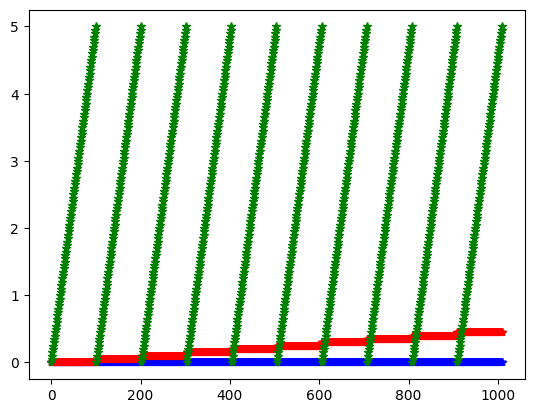

In [40]:
plt.plot(lon_source[0:1010], '*', color = 'blue')
plt.plot(lat_source[0:1010], '*', color = 'red')
plt.plot(depth_source[0:1010], '*', color = 'green')